In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/dataR2.csv


In [65]:
import pandas as pd
breastcancer_df = pd.read_csv('/kaggle/input/breast-cancer-dataset/dataR2.csv')

In [66]:
breastcancer_df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [67]:
breastcancer_df.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [68]:
breastcancer_df.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [69]:
breastcancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [70]:
breastcancer_df.isna()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
111,False,False,False,False,False,False,False,False,False,False
112,False,False,False,False,False,False,False,False,False,False
113,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False


In [71]:
breastcancer_df.describe() #deskripsi data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [72]:
breastcancer_df.corr() #korelasi antar kolom

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [75]:
X = breastcancer_df.drop(columns='Classification')
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [76]:
y = breastcancer_df['Classification']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_train.shape)
print(y_train.shape)

training dataset
(92, 9)
(92,)

testing dataset:
(92, 9)
(92,)


In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
k_range = list(range(1,10)) 
scores = [] 
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test) 
    scores.append(accuracy_score(y_test, y_pred))

<function matplotlib.pyplot.show(close=None, block=None)>

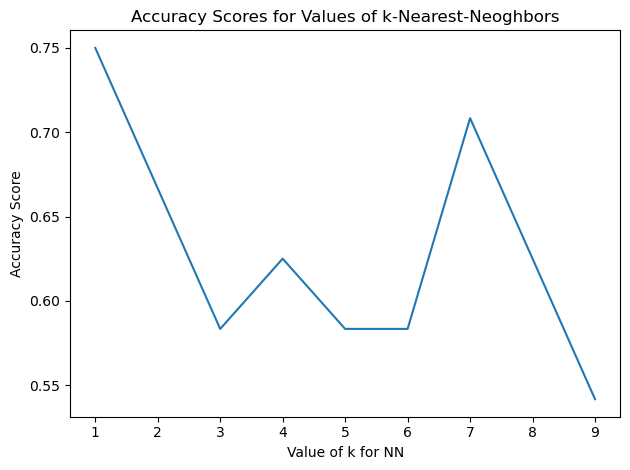

In [80]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for NN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k-Nearest-Neoghbors')
plt.tight_layout()
plt.show

In [81]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)

In [82]:
print(confusion_matrix(y_test, y_pred))

[[5 5]
 [5 9]]


In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50        10
           2       0.64      0.64      0.64        14

    accuracy                           0.58        24
   macro avg       0.57      0.57      0.57        24
weighted avg       0.58      0.58      0.58        24



In [84]:
#Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression

# create a logistic regression model and fit it to the training data
model_logreg = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)

In [85]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.8333333333333334


In [86]:
#confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 8  2]
 [ 2 12]]


In [87]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        10
           2       0.86      0.86      0.86        14

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



In [88]:
#support vector classifier (model SVM)
from sklearn.svm import SVC

In [89]:
#model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
model_svc = model_svc.predict(X_test)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        10
           2       0.86      0.86      0.86        14

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



In [91]:
#Decision Tree Classifier (DT)
from sklearn.tree import DecisionTreeClassifier

In [92]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
model_dt = model_dt.predict(X_test)

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80        10
           2       0.86      0.86      0.86        14

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



In [94]:
#Random Forest Classifier (RF)
from sklearn.ensemble import RandomForestClassifier

In [95]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.92      0.86      0.89        14

    accuracy                           0.88        24
   macro avg       0.87      0.88      0.87        24
weighted avg       0.88      0.88      0.88        24



In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into features and target
X = breastcancer_df.drop("Classification", axis=1)
y = breastcancer_df["Classification"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

# Train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Train the support vector machine model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

In [105]:
# initialize models
model_knn = KNeighborsClassifier()
model_logreg = LogisticRegression()
model_svc = SVC()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

# fit each model to the training data
model_knn.fit(X_train, y_train)
model_logreg.fit(X_train, y_train)
model_svc.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [106]:
#accuracy comparision for various models.
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.8333333333333334, 0.875, 0.875, 0.7916666666666666, 0.7916666666666666]


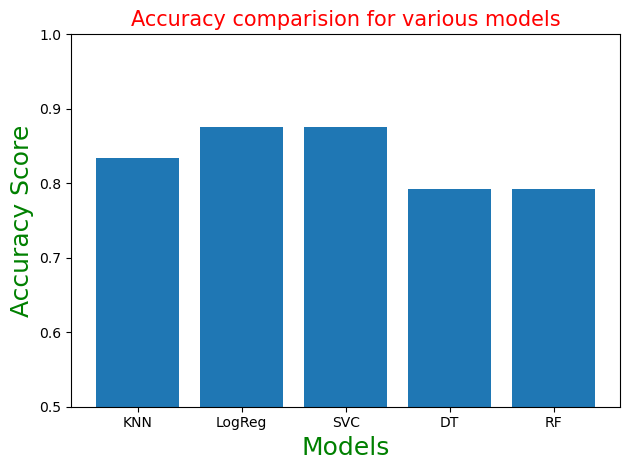

In [108]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.5, 1)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()